## Problem Statement

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 


#### objective:
* To predict whether the customer would be interested in Vehicle insurance.

### Understand the data

#### Variable  - Description
* id - 	                   Unique ID for the customer
* Gender - 	               Gender of the customer
* Age -                      Age of the customer
* Driving_License - 	       0 : Customer does not have DL, 1 : Customer already has DL
* Region_Code -               Unique code for the region of the customer
* Previously_Insured - 	   1 : Customer already has Vehicle Insurance, 0 : Customer doesnt have Vehicle Insurance
* Vehicle_Age - 	           Age of the Vehicle 
* Vehicle_Damage -            1 : Customer got his/her vehicle damaged in the past. 0 : Customer didnt get his/her vehicle damaged in the past.
* Annual_Premium - 	       The amount customer needs to pay as premium in the year
* Policy_Sales_Channel -    Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage -          	   Number of Days, Customer has been associated with the company


##### target
* Response -          	  1 :  Customer is interested, 0 : Customer is not interested 


In [452]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [453]:
# read the data
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

### Descriptive Analysis

In [455]:
# total no.of rose and columns
train.shape, test.shape

((381109, 12), (127037, 11))

In [456]:
# get the dataypes of train data set
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [457]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [458]:
# to see the first 2 rows
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [459]:
# to check missing data
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [460]:
train.isna().sum()/train.shape[0]*100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [461]:
# percentage of missing data in each column
(train.isna().sum()/train.shape[0]*100).sort_values()

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [462]:
# to check duplicates
train.duplicated().sum()

0

In [463]:
# check target data
train['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [464]:
train.Response.value_counts(normalize=True)*100

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

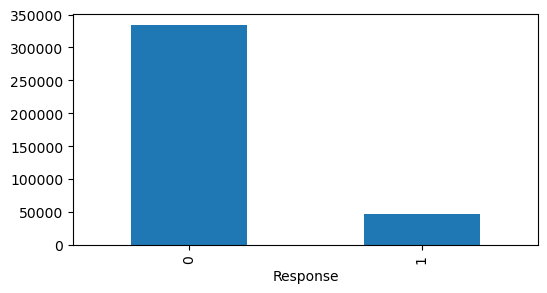

In [667]:
train.Response.value_counts().plot(kind='bar',figsize=(6,3))
plt.show()

* Above plot shows the target- "Response" data is imbalance

In [467]:
tgt_col = ['Response']
ign_cols = ['id']

In [468]:
# statistical inference

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [469]:
train =train.drop(columns=ign_cols)

In [470]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [471]:
train.describe(include='object').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [472]:
train.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

In [473]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1


In [474]:
# check unique values

for col in train.columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

Gender 2 => ['Male' 'Female']
Age 66 => [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2 => [1 0]
Region_Code 53 => [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2 => [0 1]
Vehicle_Age 3 => ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage 2 => ['Yes' 'No']
Annual_Premium 48838 => [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155 => [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  

In [475]:
import warnings
warnings.filterwarnings('ignore')

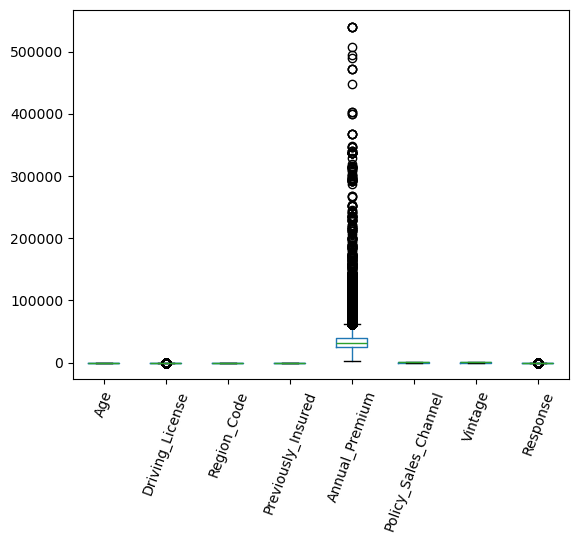

In [678]:
train.boxplot(grid=False, rot=70, fontsize=10)   
plt.show()

* We seecan that outliers are present in Driving license, Anuual_premium, Response

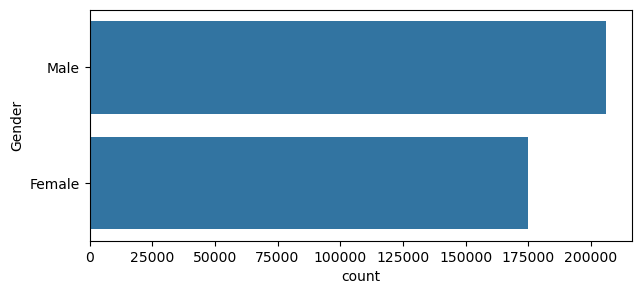

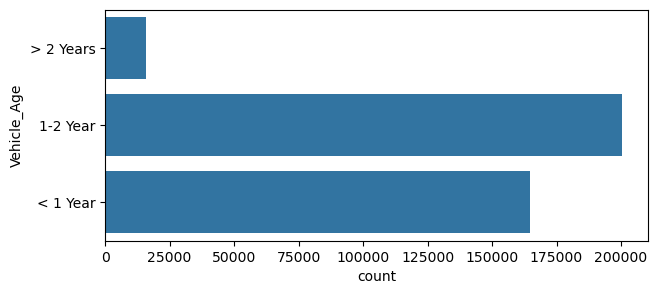

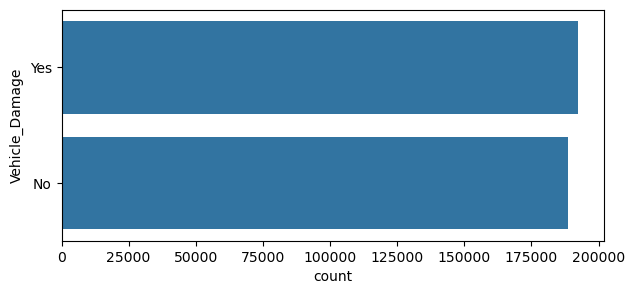

In [478]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(7,3))
    sns.countplot(y=train[col])
    plt.show()

* Vehicle age>2 years are less
* Vehicle between 1-2 years are more
* Vehicle damage is almost same for yes and no


### Preprocessing

* steps:

* address missing data
* encoding on category columns
* standardize numerical columns
* treat data imbalance 


In [484]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [485]:
train.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [486]:
# separate category and numeric features

cat_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

num_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [487]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['Response']
['id']
['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


#### Pipelining

In [489]:
# categorical preperation

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [490]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])


In [491]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [492]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [493]:
X = train.drop(columns=tgt_col)
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183


In [494]:
y = train[tgt_col]
y.head(2)

,Response
0,1
1,0


#### train test split

In [496]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [497]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [498]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', LogisticRegression())])

In [499]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', LogisticRegression())])

In [500]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[9.99560198e-01, 4.39801846e-04],
       [7.20521550e-01, 2.79478450e-01],
       [6.87021023e-01, 3.12978977e-01],
       ...,
       [8.42339826e-01, 1.57660174e-01],
       [8.07951356e-01, 1.92048644e-01],
       [6.86851592e-01, 3.13148408e-01]])

In [501]:
model_pipeline.predict_proba(val_X)[:,0]  #0 probabilities

array([0.9995602 , 0.72052155, 0.68702102, ..., 0.84233983, 0.80795136,
       0.68685159])

In [502]:
model_pipeline.predict_proba(val_X)[:,1]  #1 probabilities

array([0.0004398 , 0.27947845, 0.31297898, ..., 0.15766017, 0.19204864,
       0.31314841])

In [503]:
# predict target 

model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [504]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
 

Train AUC
0.5000668710484634
Valid AUC
0.5
Train cnf_matrix
[[301061     10]
 [ 41920      7]]
Valid cnf_matrix
[[33328     0]
 [ 4783     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    301071
           1       0.41      0.00      0.00     41927

    accuracy                           0.88    342998
   macro avg       0.64      0.50      0.47    342998
weighted avg       0.82      0.88      0.82    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.00      0.00      0.00      4783

    accuracy                           0.87     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.76      0.87      0.82     38111



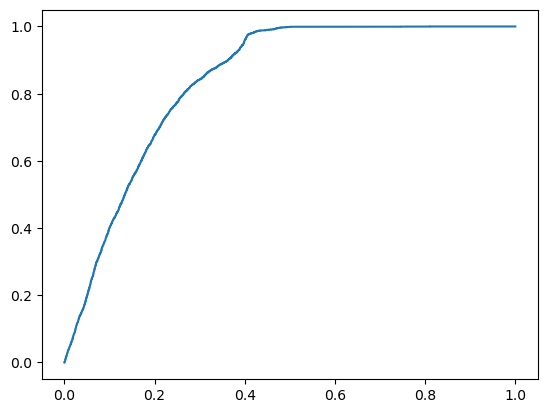

In [505]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

### Using GridSearch to hyper tune single model

In [507]:
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]


In [508]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [509]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Driving_License',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [510]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}

In [511]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836347,4
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836348,1
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836348,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836348,1


In [512]:
# read the submission file
#predict with the last model
#and upload into the hack website

sub = pd.read_csv('sampl')
sub.head(3)

,id,Response
0,381110,0
1,381111,0
2,381112,0


In [513]:
 test.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


In [514]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [515]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline.predict(test)

In [516]:
sub.to_csv('sub_1.csv',index=False)

In [517]:
sub

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


#####
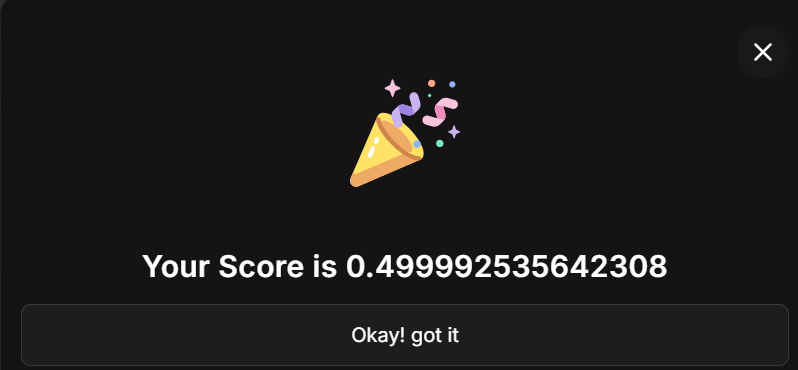

### pickling the model

In [520]:
import joblib

In [521]:
joblib.dump(model_pipeline,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

### perform oversampling to balance the dataset

In [523]:
from imblearn.over_sampling import RandomOverSampler

In [524]:
# !pip install imblearn

In [525]:
over_sampling = RandomOverSampler()

In [526]:
import imblearn
imblearn.__version__

'0.12.3'

In [527]:
import sklearn
sklearn.__version__

'1.5.1'

In [528]:
train_y.value_counts()

Response
0           301071
1            41927
Name: count, dtype: int64

In [529]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [530]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [531]:
from sklearn.tree import DecisionTreeClassifier

#### Using GridSearch to hyper tune multi model

In [533]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]


In [534]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [535]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=2, scoring='roc_auc')

In [536]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Driving_License',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [537]:
grid_2.best_params_

{'model': DecisionTreeClassifier(), 'model__max_depth': 5}

In [538]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [539]:
grid_2.cv_results_

{'mean_fit_time': array([0.59403467, 0.58725429, 0.60019648, 0.59430683, 0.64708674,
        0.76255846]),
 'std_fit_time': array([0.02702546, 0.02961063, 0.02682221, 0.017115  , 0.00147831,
        0.0068779 ]),
 'mean_score_time': array([0.22639143, 0.22766232, 0.24121594, 0.22602868, 0.2122581 ,
        0.20837092]),
 'std_score_time': array([0.00256503, 0.00940967, 0.00550485, 0.00505495, 0.00304747,
        0.0040586 ]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(), DecisionTreeClassifier()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3.0, 3.0, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value=1e+20),
 'param_model__penalty': masked_array(data=['l2', None, 'l2', None, --, --],
     

In [683]:
new_model = grid_2.best_estimator_

Train AUC
0.7911941327744587
Valid AUC
0.7955868245212355
Train cnf_matrix
[[201579  99492]
 [  3654  38273]]
Valid cnf_matrix
[[22455 10873]
 [  395  4388]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    301071
           1       0.28      0.91      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.79      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     33328
           1       0.29      0.92      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111



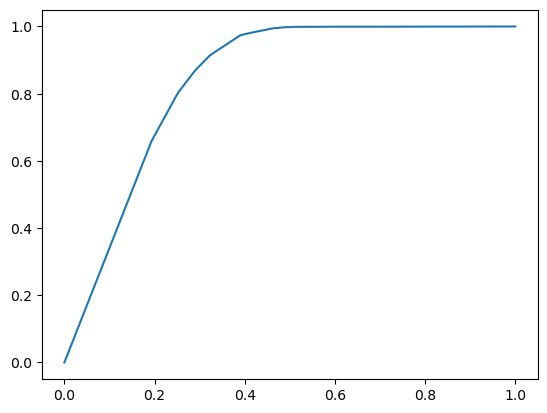

In [541]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.7916305456188074
Valid AUC
0.7955868245212355
Train cnf_matrix
[[201579  99492]
 [ 25976 275095]]
Valid cnf_matrix
[[22455 10873]
 [  395  4388]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.89      0.67      0.76    301071
           1       0.73      0.91      0.81    301071

    accuracy                           0.79    602142
   macro avg       0.81      0.79      0.79    602142
weighted avg       0.81      0.79      0.79    602142

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     33328
           1       0.29      0.92      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111



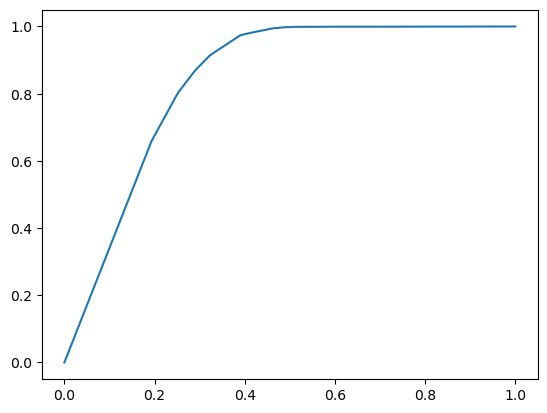

In [542]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

#model_train_val_eval(val_X,val_y,new_model)-- train_X

In [543]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836460,2
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836460,4
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836460,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836460,4
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.817118,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.837540,1


In [544]:
# updating the existing target values with predicted values
sub['Response'] = new_model.predict(test)
sub.to_csv('sub_2.csv',index=False)


* result uploaded in the analytics vidhya website and the recieved score
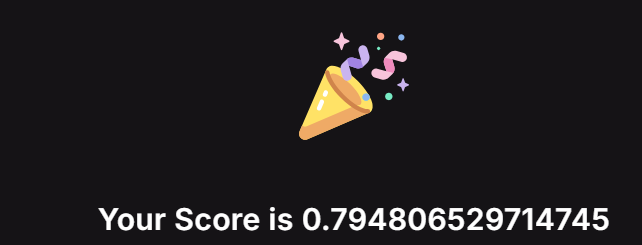


#### Using GridSearch to hyper tune multi model along with ensembling

In [547]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier

In [548]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()]],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],    
    }

]


In [549]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, 
                    cv=2, scoring='roc_auc')

In [550]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]},
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier()]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8]}],
             scoring='roc_auc')

In [551]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8}

In [552]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)]],
                                    final_estimator=LogisticRegression()))])

In [553]:
new_model_3 = grid_3.best_estimator_

Train AUC
0.7939458560967017
Valid AUC
0.7974150722990863
Train cnf_matrix
[[204708  96363]
 [  3859  38068]]
Valid cnf_matrix
[[22765 10563]
 [  422  4361]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.68      0.80    301071
           1       0.28      0.91      0.43     41927

    accuracy                           0.71    342998
   macro avg       0.63      0.79      0.62    342998
weighted avg       0.90      0.71      0.76    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.68      0.81     33328
           1       0.29      0.91      0.44      4783

    accuracy                           0.71     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.71      0.76     38111



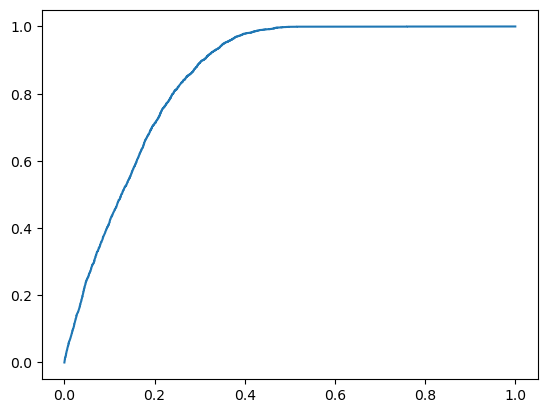

In [554]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_3)

In [555]:

res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836460,4
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836460,6
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836460,5
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836460,6
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.817118,8
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.837534,3
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4}",0.842148,2
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 8}",0.854321,1


In [556]:
# updating the existing target values with predicted values
sub['Response'] = new_model_3.predict(test)
sub.to_csv('sub_3.csv',index=False)


* result uploaded in the analytics vidhya website and the recieved score



In [558]:
joblib.dump(new_model_3,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [559]:
train.iloc[0]

Gender                       Male
Age                            44
Driving_License                 1
Region_Code                  28.0
Previously_Insured              0
Vehicle_Age             > 2 Years
Vehicle_Damage                Yes
Annual_Premium            40454.0
Policy_Sales_Channel         26.0
Vintage                       217
Response                        1
Name: 0, dtype: object

In [661]:
!pip install fastapi

In [663]:
!pip install pydantic